In [2]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [3]:
working_df = pd.read_csv(Path('Covid-19/FINAL_DATABASE.csv'))
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [4]:
working_df.dtypes

Date                      object
S_P Close                float64
S_P Volume                 int64
Median Sale Price          int64
Homes Sold                 int64
INFLATION_EXPECTATION    float64
SALES                      int64
UNEMPLOYMENT             float64
NAS Value                float64
NAS Volume                 int64
Covid_New_Cases          float64
Covid_Death              float64
dtype: object

In [5]:
working_df.shape

(62, 12)

In [6]:
working_df['Covid_New_Cases'] = working_df['Covid_New_Cases'].replace(np.nan, 0)
working_df['Covid_Death'] = working_df['Covid_Death'].replace(np.nan, 0)
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,0.0,0.0
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,0.0,0.0
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,0.0,0.0
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,0.0,0.0
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,0.0,0.0


## Check for linearity between the various features and the Y variable

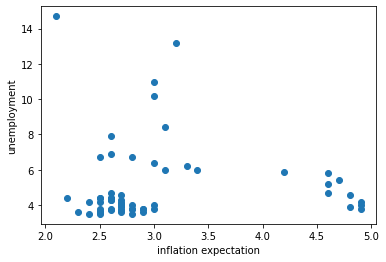

In [7]:
# plot the relationship between unemployment and inflation 
plt.scatter(working_df.INFLATION_EXPECTATION, working_df.UNEMPLOYMENT)
plt.xlabel('inflation expectation')
plt.ylabel('unemployment')
plt.show()

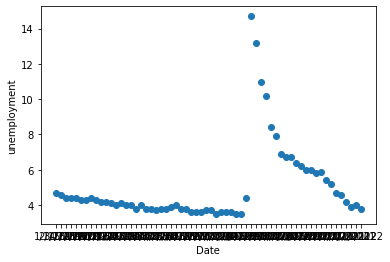

In [8]:
# plot the unemployment data
plt.scatter(working_df.Date, working_df.UNEMPLOYMENT)
plt.xlabel('Date')
plt.ylabel('unemployment')
plt.show()

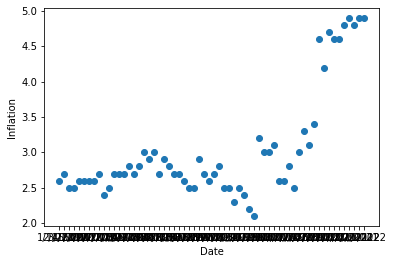

In [9]:
# plot the inflation data
plt.scatter(working_df.Date, working_df.INFLATION_EXPECTATION)
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.show()

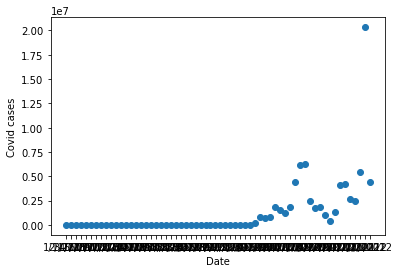

In [9]:
# plot the Covid cases data
plt.scatter(working_df.Date, working_df.Covid_New_Cases)
plt.xlabel('Date')
plt.ylabel('Covid cases')
plt.show()

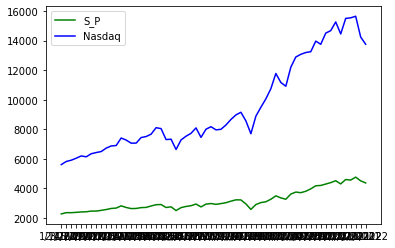

In [16]:
# multiple line chart
plt.plot(working_df['Date'], working_df['S_P Close'], color='g', label='S_P')
plt.plot(working_df['Date'], working_df['NAS Value'], color='b', label='Nasdaq')

plt.legend()
plt.show()


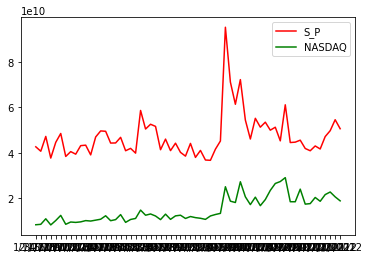

In [19]:
# multiple line chart
plt.plot(working_df['Date'], working_df['S_P Volume'], color='r', label='S_P')
plt.plot(working_df['Date'], working_df['NAS Volume'], color='g', label='NASDAQ')

plt.legend()
plt.show()

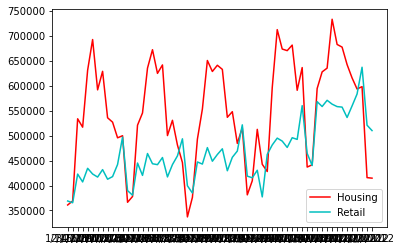

In [17]:
# multiple line chart
plt.plot(working_df['Date'], working_df['Homes Sold'], color='r', label='Housing')
plt.plot(working_df['Date'], working_df['SALES'], color='c', label='Retail')

plt.legend()
plt.show()

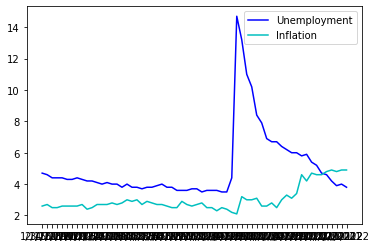

In [18]:
# multiple line chart
plt.plot(working_df['Date'], working_df['UNEMPLOYMENT'], color='b', label='Unemployment')
plt.plot(working_df['Date'], working_df['INFLATION_EXPECTATION'], color='c', label='Inflation')

plt.legend()
plt.show()

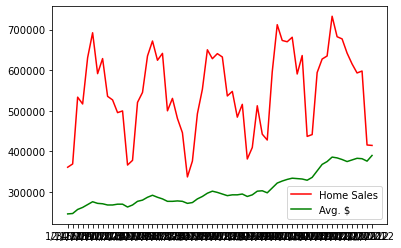

In [20]:
# multiple line chart
plt.plot(working_df['Date'], working_df['Homes Sold'], color='r', label='Home Sales')
plt.plot(working_df['Date'], working_df['Median Sale Price'], color='g', label='Avg. $')

plt.legend()
plt.show()

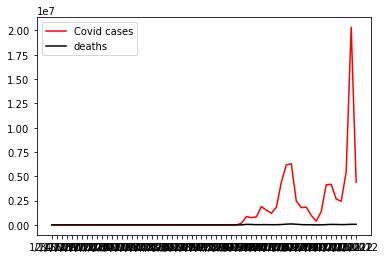

In [21]:
# multiple line chart
plt.plot(working_df['Date'], working_df['Covid_New_Cases'], color='r', label='Covid cases')
plt.plot(working_df['Date'], working_df['Covid_Death'], color='k', label='deaths')

plt.legend()
plt.show()

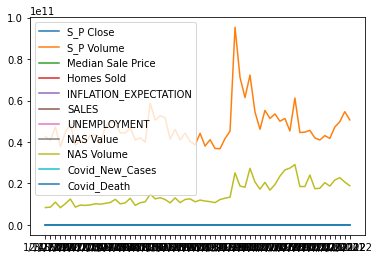

In [22]:
for col in working_df.columns:
    if not col == 'Date':
        plt.plot(working_df['Date'], working_df[col], label=col)
        
plt.legend()
plt.show()

## perform the multiple regression model

In [10]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# assign the target variable (unemployment) to y
# y = working_df["UNEMPLOYMENT"]

# assign the rest of the columns to X
# working_df.drop(['Date', 'UNEMPLOYMENT'], axis = 1, inplace = True)

In [12]:
# create an instance of a linear regression model
model = LinearRegression()

In [13]:
# fit, or train the data
model.fit(X, y)

LinearRegression()

In [14]:
# generate predictions 
y_pred = model.predict(X)
print(y_pred.shape)

(62,)


ValueError: x and y must be the same size

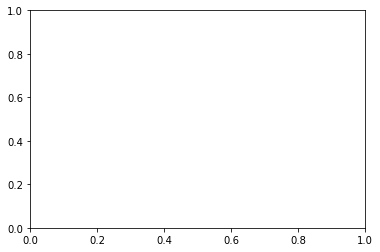

In [15]:
# plot the predictions as a red line over the data points
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
# slope of the line is "model.coef_"
# y-intercept of the line is "model.intercept_"
print(model.coef_)
print(model.intercept_)